In [4]:
import numpy as np

#oma moodulid
import Spectra as sp
from fittings import  fit_DLorentz, fit_DLorentz_colnames

def p(xc2): #Rõhk 2.maksimumi asukoha järgi (nullrõhul 694.28 nm, rõhukoef 0.76 cm^-1 / kbar)
    return -1e7*(1/xc2 - 1/ 694.28)*0.76


In [5]:

ruby = sp.Spectra("210406_ruby.spc")
hdg = {'alg':2, 'rõhul':3 ,'lõpprõhk':5 ,"rõhk maas":6}

cur = ruby[hdg['alg']]
fitted,params =  fit_DLorentz(np.array(cur.spc), np.array(cur.xVect()), 693.5) #eraldusx maksimumide vahel
#leiame rõhu kbar (xc2 on param nr. 6)
p(params[0][6])

1.1056709076137823

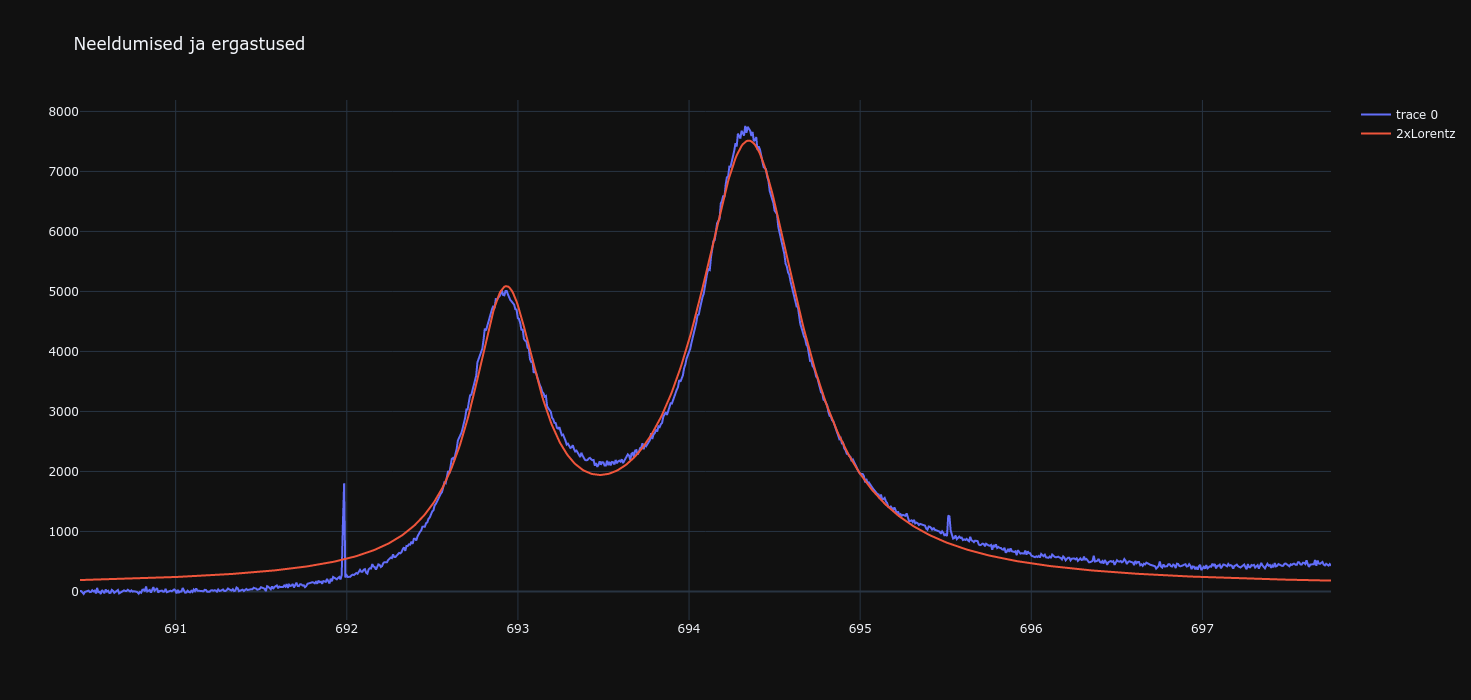

In [6]:
import plotly.graph_objects as go
fig1 = go.Figure(data=go.Scatter(x=cur.xVect(), y=cur.spc, mode = 'lines')) 
fig1.add_trace(go.Scatter(x =cur.xVect(), y=fitted[0], mode = 'lines', name = "2xLorentz"))
fig1.update_layout(height = 700, title = "Neeldumised ja ergastused",template = "plotly_dark")
fig1